# Question 3: [Regression]
Use Keras’ built-in Boston House
Pricing dataset (from keras.datasets import boston_housing) to
perform regression and predict house prices. Use k-fold cross
validation and show loss/MAE plots by epoch.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


First, we need to normalize the features.

In [2]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

Build a simple model with **no regularizer**

In [3]:
from keras import models
from keras import layers
def build_model_no_reg():
    model_no_regularizer = models.Sequential()
    model_no_regularizer.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model_no_regularizer.add(layers.Dense(64, activation='relu'))
    model_no_regularizer.add(layers.Dense(1))

    model_no_regularizer.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    model_no_regularizer.summary()
    
    return model_no_regularizer

Do k-fold cross validation with k=5 for 50 epochs.

In [23]:
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import numpy

seed = 573
numpy.random.seed(seed)
kfold = KFold(n_splits=5, random_state=seed)
history = []
for train, valid in kfold.split(x_train, y_train):
    model = build_model_no_reg()
    history.append(model.fit(x_train[train], y_train[train], epochs=50, validation_data=(x_train[valid], y_train[valid]), batch_size=5, verbose=1))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 1s 3ms/step - loss: 366.9492 - mean_absolute_error: 16.9053 - val_loss: 113.8808 - val_mean_absolute_error: 8.5541
Epoch 2/50
323/323 [==============================] - 0s 727us/step - loss: 76.6324 - mean_absolute_error: 6.9079 - val_loss: 36.0740 - val_mean_absolute_error: 4.3356
Epoch 3/50
323/323 [==

323/323 [==============================] - 0s 767us/step - loss: 7.5033 - mean_absolute_error: 1.8951 - val_loss: 7.2316 - val_mean_absolute_error: 1.6922
Epoch 46/50
323/323 [==============================] - 0s 817us/step - loss: 7.4971 - mean_absolute_error: 1.8880 - val_loss: 8.5464 - val_mean_absolute_error: 2.2776
Epoch 47/50
323/323 [==============================] - 0s 832us/step - loss: 7.6134 - mean_absolute_error: 1.8809 - val_loss: 7.3568 - val_mean_absolute_error: 1.8204
Epoch 48/50
323/323 [==============================] - 0s 851us/step - loss: 7.4429 - mean_absolute_error: 1.8748 - val_loss: 7.4992 - val_mean_absolute_error: 1.6864
Epoch 49/50
323/323 [==============================] - 0s 786us/step - loss: 7.4742 - mean_absolute_error: 1.8497 - val_loss: 7.2443 - val_mean_absolute_error: 1.7311
Epoch 50/50
323/323 [==============================] - 0s 913us/step - loss: 6.9028 - mean_absolute_error: 1.8358 - val_loss: 7.2859 - val_mean_absolute_error: 1.9369
__________

323/323 [==============================] - 0s 699us/step - loss: 6.7912 - mean_absolute_error: 1.8014 - val_loss: 13.4403 - val_mean_absolute_error: 2.8607
Epoch 40/50
323/323 [==============================] - 0s 675us/step - loss: 6.7467 - mean_absolute_error: 1.8456 - val_loss: 15.2881 - val_mean_absolute_error: 3.0822
Epoch 41/50
323/323 [==============================] - 0s 671us/step - loss: 6.6874 - mean_absolute_error: 1.8291 - val_loss: 12.3758 - val_mean_absolute_error: 2.7643
Epoch 42/50
323/323 [==============================] - 0s 712us/step - loss: 6.3888 - mean_absolute_error: 1.7608 - val_loss: 15.2860 - val_mean_absolute_error: 3.0517
Epoch 43/50
323/323 [==============================] - 0s 687us/step - loss: 6.4220 - mean_absolute_error: 1.7915 - val_loss: 13.1226 - val_mean_absolute_error: 2.8377
Epoch 44/50
323/323 [==============================] - 0s 761us/step - loss: 6.2199 - mean_absolute_error: 1.7516 - val_loss: 11.9952 - val_mean_absolute_error: 2.7053
Epoc

323/323 [==============================] - 0s 777us/step - loss: 7.7325 - mean_absolute_error: 1.8861 - val_loss: 7.8986 - val_mean_absolute_error: 2.2733
Epoch 34/50
323/323 [==============================] - 0s 715us/step - loss: 7.6972 - mean_absolute_error: 1.9128 - val_loss: 7.2633 - val_mean_absolute_error: 2.1345
Epoch 35/50
323/323 [==============================] - 0s 761us/step - loss: 7.7209 - mean_absolute_error: 1.8589 - val_loss: 10.5184 - val_mean_absolute_error: 2.5458
Epoch 36/50
323/323 [==============================] - 0s 727us/step - loss: 7.5515 - mean_absolute_error: 1.8700 - val_loss: 7.9190 - val_mean_absolute_error: 2.2575
Epoch 37/50
323/323 [==============================] - 0s 727us/step - loss: 7.5076 - mean_absolute_error: 1.9085 - val_loss: 7.6585 - val_mean_absolute_error: 2.1888
Epoch 38/50
323/323 [==============================] - 0s 752us/step - loss: 7.3643 - mean_absolute_error: 1.8613 - val_loss: 8.5548 - val_mean_absolute_error: 2.3426
Epoch 39/

323/323 [==============================] - 0s 699us/step - loss: 6.2932 - mean_absolute_error: 1.9109 - val_loss: 21.3837 - val_mean_absolute_error: 2.6252
Epoch 28/50
323/323 [==============================] - 0s 684us/step - loss: 6.3796 - mean_absolute_error: 1.8811 - val_loss: 20.2558 - val_mean_absolute_error: 2.5929
Epoch 29/50
323/323 [==============================] - 0s 718us/step - loss: 6.1553 - mean_absolute_error: 1.8192 - val_loss: 20.6604 - val_mean_absolute_error: 2.6489
Epoch 30/50
323/323 [==============================] - 0s 774us/step - loss: 5.9703 - mean_absolute_error: 1.8332 - val_loss: 20.2291 - val_mean_absolute_error: 2.6856
Epoch 31/50
323/323 [==============================] - 0s 684us/step - loss: 5.6172 - mean_absolute_error: 1.8107 - val_loss: 20.5082 - val_mean_absolute_error: 2.5614
Epoch 32/50
323/323 [==============================] - 0s 690us/step - loss: 5.5484 - mean_absolute_error: 1.7889 - val_loss: 21.9741 - val_mean_absolute_error: 2.6711
Epoc

324/324 [==============================] - 0s 728us/step - loss: 9.2298 - mean_absolute_error: 2.0631 - val_loss: 12.4222 - val_mean_absolute_error: 2.4410
Epoch 22/50
324/324 [==============================] - 0s 691us/step - loss: 9.0110 - mean_absolute_error: 2.0314 - val_loss: 12.0814 - val_mean_absolute_error: 2.6105
Epoch 23/50
324/324 [==============================] - 0s 694us/step - loss: 8.6575 - mean_absolute_error: 1.9739 - val_loss: 12.1619 - val_mean_absolute_error: 2.4309
Epoch 24/50
324/324 [==============================] - 0s 691us/step - loss: 8.9500 - mean_absolute_error: 2.0430 - val_loss: 12.0394 - val_mean_absolute_error: 2.3998
Epoch 25/50
324/324 [==============================] - 0s 722us/step - loss: 8.5923 - mean_absolute_error: 1.9849 - val_loss: 12.2018 - val_mean_absolute_error: 2.3882
Epoch 26/50
324/324 [==============================] - 0s 694us/step - loss: 8.5377 - mean_absolute_error: 1.9246 - val_loss: 12.5736 - val_mean_absolute_error: 2.4991
Epoc

In [34]:
def plot_results(history, folds, source):
    
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for k in range(folds):
        acc.append(history[k].history['mean_absolute_error'])
        val_acc.append(history[k].history['val_mean_absolute_error'])
        loss.append(history[k].history['loss'])
        val_loss.append(history[k].history['val_loss'])
    
    acc = np.transpose(acc)
    val_acc = np.transpose(val_acc)
    loss = np.transpose(loss)
    val_loss = np.transpose(val_loss)
    
    plt.plot(acc)
    plt.title(source +  ' - Mean Abs. Err. on training samples')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(val_acc)
    plt.title(source +  ' - Mean Abs. Err. on validation samples')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

    plt.plot(loss)
    plt.title(source + ' - model training loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(val_loss)
    plt.title(source + ' - model validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    return acc, val_acc, loss, val_loss

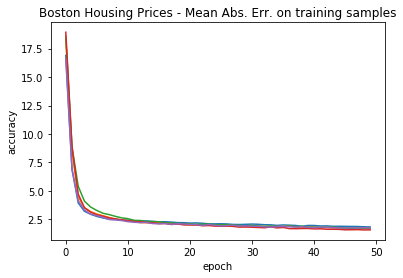

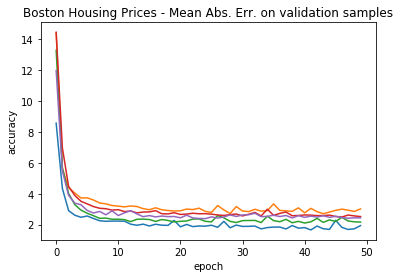

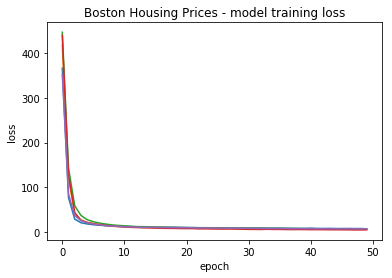

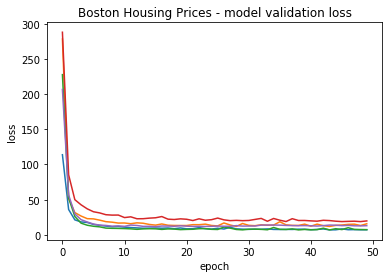

In [35]:
acc, val_acc, loss, val_loss = plot_results(history, 5, 'Boston Housing Prices')

## Question 3.a) Compare the results when using no regularizer, L2 regularizer and Dropout as a regularization method.

Model with L2 regularizer

In [44]:
from keras import regularizers

def build_model_L2_reg():
    seed = 762
    numpy.random.seed(seed)
    kfold = KFold(n_splits=5, random_state=seed)
    history = []
    for train, valid in kfold.split(x_train, y_train):
        model = models.Sequential()
        model.add(layers.Dense(64, activation='relu',
                               kernel_regularizer=regularizers.l2(0.01),
                               input_shape=(x_train.shape[1],)))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))

        model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
        model.summary()
        history.append(model.fit(x_train[train], y_train[train], epochs=50, validation_data=(x_train[valid], y_train[valid]), batch_size=5, verbose=1))

    return history

In [45]:
history = build_model_L2_reg()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_68 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 1s 3ms/step - loss: 442.3613 - mean_absolute_error: 18.6555 - val_loss: 173.6670 - val_mean_absolute_error: 10.9513
Epoch 2/50
323/323 [==============================] - 0s 743us/step - loss: 103.9249 - mean_absolute_error: 7.8486 - val_loss: 41.0971 - val_mean_absolute_error: 4.4518
Epoch 3/50
323/323 [

323/323 [==============================] - 0s 767us/step - loss: 8.0103 - mean_absolute_error: 1.8876 - val_loss: 6.7727 - val_mean_absolute_error: 1.7142
Epoch 46/50
323/323 [==============================] - 0s 746us/step - loss: 7.8522 - mean_absolute_error: 1.8855 - val_loss: 7.0474 - val_mean_absolute_error: 1.7145
Epoch 47/50
323/323 [==============================] - 0s 755us/step - loss: 7.7107 - mean_absolute_error: 1.8686 - val_loss: 7.5091 - val_mean_absolute_error: 1.8679
Epoch 48/50
323/323 [==============================] - 0s 743us/step - loss: 7.8571 - mean_absolute_error: 1.8693 - val_loss: 6.6700 - val_mean_absolute_error: 1.7821
Epoch 49/50
323/323 [==============================] - 0s 770us/step - loss: 7.6570 - mean_absolute_error: 1.8368 - val_loss: 7.2027 - val_mean_absolute_error: 2.0293
Epoch 50/50
323/323 [==============================] - 0s 749us/step - loss: 7.6602 - mean_absolute_error: 1.8477 - val_loss: 7.5015 - val_mean_absolute_error: 2.0796
__________

323/323 [==============================] - 0s 681us/step - loss: 7.2403 - mean_absolute_error: 1.8403 - val_loss: 11.6378 - val_mean_absolute_error: 2.6783
Epoch 40/50
323/323 [==============================] - 0s 885us/step - loss: 7.1028 - mean_absolute_error: 1.8407 - val_loss: 12.3931 - val_mean_absolute_error: 2.7640
Epoch 41/50
323/323 [==============================] - 0s 845us/step - loss: 6.8501 - mean_absolute_error: 1.7651 - val_loss: 12.6993 - val_mean_absolute_error: 2.7535
Epoch 42/50
323/323 [==============================] - 0s 767us/step - loss: 6.9413 - mean_absolute_error: 1.8239 - val_loss: 11.5995 - val_mean_absolute_error: 2.6703
Epoch 43/50
323/323 [==============================] - 0s 780us/step - loss: 6.9452 - mean_absolute_error: 1.7769 - val_loss: 13.9223 - val_mean_absolute_error: 2.8919
Epoch 44/50
323/323 [==============================] - 0s 718us/step - loss: 6.8061 - mean_absolute_error: 1.8145 - val_loss: 11.9838 - val_mean_absolute_error: 2.6976
Epoc

323/323 [==============================] - 0s 817us/step - loss: 8.7305 - mean_absolute_error: 1.9999 - val_loss: 8.2004 - val_mean_absolute_error: 2.2848
Epoch 34/50
323/323 [==============================] - 0s 761us/step - loss: 8.6797 - mean_absolute_error: 2.0164 - val_loss: 8.5147 - val_mean_absolute_error: 2.3490
Epoch 35/50
323/323 [==============================] - 0s 811us/step - loss: 8.5859 - mean_absolute_error: 1.9353 - val_loss: 8.0310 - val_mean_absolute_error: 2.2654
Epoch 36/50
323/323 [==============================] - 0s 786us/step - loss: 8.3781 - mean_absolute_error: 1.9760 - val_loss: 11.0092 - val_mean_absolute_error: 2.6694
Epoch 37/50
323/323 [==============================] - 0s 764us/step - loss: 8.0707 - mean_absolute_error: 1.9332 - val_loss: 7.8610 - val_mean_absolute_error: 2.1877
Epoch 38/50
323/323 [==============================] - 0s 814us/step - loss: 8.1288 - mean_absolute_error: 1.9159 - val_loss: 8.6237 - val_mean_absolute_error: 2.4081
Epoch 39/

323/323 [==============================] - 0s 743us/step - loss: 6.7975 - mean_absolute_error: 1.8995 - val_loss: 22.3227 - val_mean_absolute_error: 2.6941
Epoch 28/50
323/323 [==============================] - 0s 770us/step - loss: 6.5936 - mean_absolute_error: 1.8567 - val_loss: 21.7166 - val_mean_absolute_error: 2.6575
Epoch 29/50
323/323 [==============================] - 0s 798us/step - loss: 6.4201 - mean_absolute_error: 1.8694 - val_loss: 22.1015 - val_mean_absolute_error: 2.5947
Epoch 30/50
323/323 [==============================] - 0s 733us/step - loss: 6.4041 - mean_absolute_error: 1.8160 - val_loss: 20.7759 - val_mean_absolute_error: 2.5415
Epoch 31/50
323/323 [==============================] - 0s 743us/step - loss: 6.4907 - mean_absolute_error: 1.8704 - val_loss: 21.2753 - val_mean_absolute_error: 2.5246
Epoch 32/50
323/323 [==============================] - 0s 746us/step - loss: 6.2543 - mean_absolute_error: 1.8166 - val_loss: 20.8854 - val_mean_absolute_error: 2.5447
Epoc

324/324 [==============================] - 0s 808us/step - loss: 9.6980 - mean_absolute_error: 2.0632 - val_loss: 13.6567 - val_mean_absolute_error: 2.6171
Epoch 22/50
324/324 [==============================] - 0s 817us/step - loss: 9.5619 - mean_absolute_error: 2.0525 - val_loss: 13.2975 - val_mean_absolute_error: 2.6058
Epoch 23/50
324/324 [==============================] - 0s 842us/step - loss: 9.5187 - mean_absolute_error: 2.0650 - val_loss: 13.4249 - val_mean_absolute_error: 2.4965
Epoch 24/50
324/324 [==============================] - 0s 765us/step - loss: 9.2637 - mean_absolute_error: 2.0160 - val_loss: 12.6337 - val_mean_absolute_error: 2.4951
Epoch 25/50
324/324 [==============================] - 0s 783us/step - loss: 9.0668 - mean_absolute_error: 1.9991 - val_loss: 13.3208 - val_mean_absolute_error: 2.5641
Epoch 26/50
324/324 [==============================] - 0s 824us/step - loss: 8.7340 - mean_absolute_error: 1.9665 - val_loss: 13.3954 - val_mean_absolute_error: 2.5435
Epoc

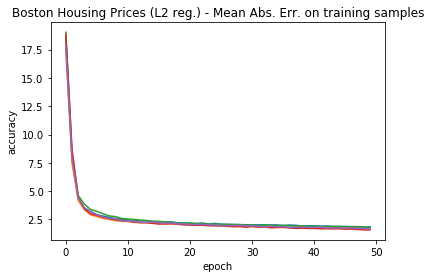

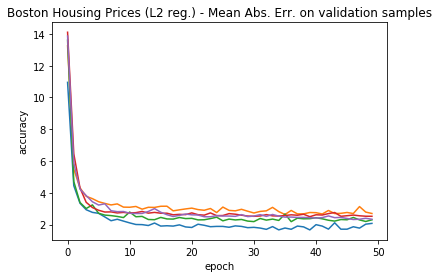

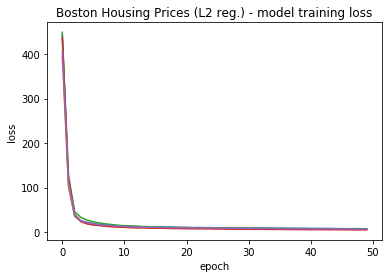

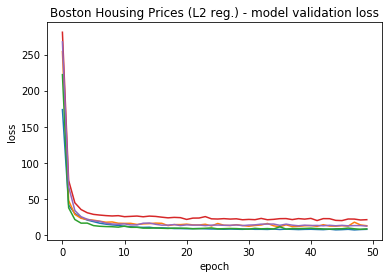

In [46]:
acc, val_acc, loss, val_loss = plot_results(history, 5, 'Boston Housing Prices (L2 reg.)')

Model with dropout (with rate 0.2)

In [49]:
def build_model_dropout():
    seed = 762
    numpy.random.seed(seed)
    kfold = KFold(n_splits=5, random_state=seed)
    history = []
    for train, valid in kfold.split(x_train, y_train):
        model = models.Sequential()
        model.add(layers.Dense(64, activation='relu',
                               kernel_regularizer=regularizers.l2(0.01),
                               input_shape=(x_train.shape[1],)))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(1))

        model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
        model.summary()
        history.append(model.fit(x_train[train], y_train[train], epochs=50, validation_data=(x_train[valid], y_train[valid]), batch_size=5, verbose=1))

    return history

In [50]:
history = build_model_dropout()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Train on 323 samples, val

323/323 [==============================] - 0s 903us/step - loss: 18.0844 - mean_absolute_error: 3.1783 - val_loss: 9.7307 - val_mean_absolute_error: 2.1579
Epoch 42/50
323/323 [==============================] - 0s 863us/step - loss: 20.6340 - mean_absolute_error: 3.1701 - val_loss: 9.4811 - val_mean_absolute_error: 1.9596
Epoch 43/50
323/323 [==============================] - 0s 913us/step - loss: 19.5411 - mean_absolute_error: 3.1830 - val_loss: 9.4614 - val_mean_absolute_error: 1.8653
Epoch 44/50
323/323 [==============================] - 0s 879us/step - loss: 18.8490 - mean_absolute_error: 3.1199 - val_loss: 9.4266 - val_mean_absolute_error: 2.1659
Epoch 45/50
323/323 [==============================] - 0s 925us/step - loss: 18.5543 - mean_absolute_error: 3.1816 - val_loss: 9.8925 - val_mean_absolute_error: 1.9600
Epoch 46/50
323/323 [==============================] - 0s 838us/step - loss: 17.9202 - mean_absolute_error: 3.1435 - val_loss: 9.0836 - val_mean_absolute_error: 1.9029
Epoc

323/323 [==============================] - 0s 811us/step - loss: 16.7804 - mean_absolute_error: 2.9994 - val_loss: 14.4234 - val_mean_absolute_error: 3.0160
Epoch 34/50
323/323 [==============================] - 0s 814us/step - loss: 15.5215 - mean_absolute_error: 2.9413 - val_loss: 14.0636 - val_mean_absolute_error: 2.9792
Epoch 35/50
323/323 [==============================] - 0s 823us/step - loss: 18.1309 - mean_absolute_error: 3.0022 - val_loss: 15.2985 - val_mean_absolute_error: 3.0312
Epoch 36/50
323/323 [==============================] - 0s 783us/step - loss: 19.1922 - mean_absolute_error: 3.1150 - val_loss: 13.6733 - val_mean_absolute_error: 2.9244
Epoch 37/50
323/323 [==============================] - 0s 808us/step - loss: 18.2777 - mean_absolute_error: 2.9935 - val_loss: 14.1060 - val_mean_absolute_error: 2.9508
Epoch 38/50
323/323 [==============================] - 0s 777us/step - loss: 16.1359 - mean_absolute_error: 2.9877 - val_loss: 15.3793 - val_mean_absolute_error: 3.070

323/323 [==============================] - 0s 755us/step - loss: 23.1637 - mean_absolute_error: 3.4523 - val_loss: 10.1912 - val_mean_absolute_error: 2.5478
Epoch 26/50
323/323 [==============================] - 0s 1ms/step - loss: 21.5464 - mean_absolute_error: 3.3387 - val_loss: 10.2683 - val_mean_absolute_error: 2.5453
Epoch 27/50
323/323 [==============================] - 0s 1ms/step - loss: 18.3621 - mean_absolute_error: 3.1722 - val_loss: 9.6140 - val_mean_absolute_error: 2.4561
Epoch 28/50
323/323 [==============================] - 0s 938us/step - loss: 20.3413 - mean_absolute_error: 3.2760 - val_loss: 8.3942 - val_mean_absolute_error: 2.2530
Epoch 29/50
323/323 [==============================] - 0s 814us/step - loss: 18.7480 - mean_absolute_error: 3.2540 - val_loss: 8.8069 - val_mean_absolute_error: 2.3151
Epoch 30/50
323/323 [==============================] - 0s 832us/step - loss: 20.2171 - mean_absolute_error: 3.2427 - val_loss: 9.6823 - val_mean_absolute_error: 2.4119
Epoch 

323/323 [==============================] - 0s 749us/step - loss: 18.3529 - mean_absolute_error: 3.1141 - val_loss: 25.6234 - val_mean_absolute_error: 2.8781
Epoch 18/50
323/323 [==============================] - 0s 817us/step - loss: 17.8402 - mean_absolute_error: 3.1762 - val_loss: 25.8926 - val_mean_absolute_error: 2.8375
Epoch 19/50
323/323 [==============================] - 0s 792us/step - loss: 18.7427 - mean_absolute_error: 3.1860 - val_loss: 25.5119 - val_mean_absolute_error: 2.9818
Epoch 20/50
323/323 [==============================] - 0s 780us/step - loss: 17.6320 - mean_absolute_error: 3.1310 - val_loss: 29.0120 - val_mean_absolute_error: 3.0510
Epoch 21/50
323/323 [==============================] - 0s 743us/step - loss: 19.4472 - mean_absolute_error: 3.2613 - val_loss: 24.8234 - val_mean_absolute_error: 2.8090
Epoch 22/50
323/323 [==============================] - 0s 888us/step - loss: 16.4107 - mean_absolute_error: 3.0733 - val_loss: 23.8408 - val_mean_absolute_error: 2.781

324/324 [==============================] - 0s 885us/step - loss: 26.4529 - mean_absolute_error: 3.6422 - val_loss: 19.2875 - val_mean_absolute_error: 3.0472
Epoch 10/50
324/324 [==============================] - 0s 845us/step - loss: 23.3389 - mean_absolute_error: 3.5197 - val_loss: 17.2057 - val_mean_absolute_error: 3.0667
Epoch 11/50
324/324 [==============================] - 0s 969us/step - loss: 23.1492 - mean_absolute_error: 3.2613 - val_loss: 16.9230 - val_mean_absolute_error: 2.9208
Epoch 12/50
324/324 [==============================] - 0s 956us/step - loss: 24.2583 - mean_absolute_error: 3.4280 - val_loss: 15.5285 - val_mean_absolute_error: 2.8073
Epoch 13/50
324/324 [==============================] - 0s 916us/step - loss: 24.1058 - mean_absolute_error: 3.4385 - val_loss: 14.7460 - val_mean_absolute_error: 2.8124
Epoch 14/50
324/324 [==============================] - 0s 1ms/step - loss: 19.5870 - mean_absolute_error: 3.2301 - val_loss: 15.3045 - val_mean_absolute_error: 2.9783


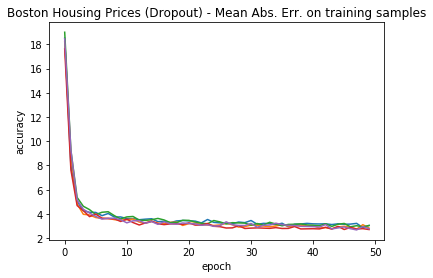

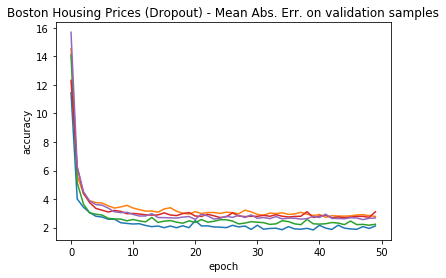

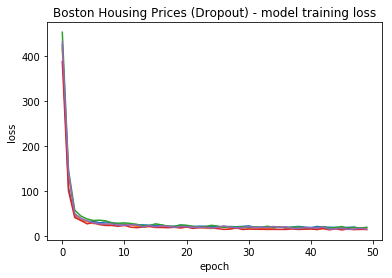

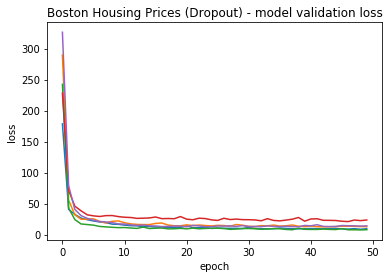

In [51]:
acc, val_acc, loss, val_loss = plot_results(history, 5, 'Boston Housing Prices (Dropout)')

## Question 3.b) Try a different loss function and report the difference.

We have been using mean squared error for the loss, we can try mean absolute error.

In [52]:
def build_model_mae():
    seed = 762
    numpy.random.seed(seed)
    kfold = KFold(n_splits=5, random_state=seed)
    history = []
    for train, valid in kfold.split(x_train, y_train):
        model = models.Sequential()
        model.add(layers.Dense(64, activation='relu',
                               input_shape=(x_train.shape[1],)))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))

        model.compile(optimizer='rmsprop',
                  loss='mean_absolute_error',
                  metrics=['mae'])
        model.summary()
        history.append(model.fit(x_train[train], y_train[train], epochs=50, validation_data=(x_train[valid], y_train[valid]), batch_size=5, verbose=1))

    return history

In [53]:
history = build_model_mae()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_99 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 2s 5ms/step - loss: 18.2457 - mean_absolute_error: 18.2457 - val_loss: 10.0957 - val_mean_absolute_error: 10.0957
Epoch 2/50
323/323 [==============================] - 0s 829us/step - loss: 7.4791 - mean_absolute_error: 7.4791 - val_loss: 4.3257 - val_mean_absolute_error: 4.3257
Epoch 3/50
323/323 [=====

323/323 [==============================] - 0s 736us/step - loss: 1.8820 - mean_absolute_error: 1.8820 - val_loss: 1.8616 - val_mean_absolute_error: 1.8616
Epoch 46/50
323/323 [==============================] - 0s 770us/step - loss: 1.8567 - mean_absolute_error: 1.8567 - val_loss: 1.7593 - val_mean_absolute_error: 1.7593
Epoch 47/50
323/323 [==============================] - 0s 736us/step - loss: 1.8451 - mean_absolute_error: 1.8451 - val_loss: 1.8849 - val_mean_absolute_error: 1.8849
Epoch 48/50
323/323 [==============================] - 0s 727us/step - loss: 1.8451 - mean_absolute_error: 1.8451 - val_loss: 1.9953 - val_mean_absolute_error: 1.9953
Epoch 49/50
323/323 [==============================] - 0s 767us/step - loss: 1.8267 - mean_absolute_error: 1.8267 - val_loss: 1.8286 - val_mean_absolute_error: 1.8286
Epoch 50/50
323/323 [==============================] - 0s 712us/step - loss: 1.8339 - mean_absolute_error: 1.8339 - val_loss: 1.9276 - val_mean_absolute_error: 1.9276
__________

323/323 [==============================] - 0s 835us/step - loss: 1.8464 - mean_absolute_error: 1.8464 - val_loss: 2.5132 - val_mean_absolute_error: 2.5132
Epoch 40/50
323/323 [==============================] - 0s 869us/step - loss: 1.8303 - mean_absolute_error: 1.8303 - val_loss: 2.6089 - val_mean_absolute_error: 2.6089
Epoch 41/50
323/323 [==============================] - 0s 848us/step - loss: 1.7713 - mean_absolute_error: 1.7713 - val_loss: 2.5804 - val_mean_absolute_error: 2.5804
Epoch 42/50
323/323 [==============================] - 0s 829us/step - loss: 1.8242 - mean_absolute_error: 1.8242 - val_loss: 2.5808 - val_mean_absolute_error: 2.5808
Epoch 43/50
323/323 [==============================] - 0s 774us/step - loss: 1.8129 - mean_absolute_error: 1.8129 - val_loss: 2.5702 - val_mean_absolute_error: 2.5702
Epoch 44/50
323/323 [==============================] - 0s 1ms/step - loss: 1.7924 - mean_absolute_error: 1.7924 - val_loss: 2.4933 - val_mean_absolute_error: 2.4933
Epoch 45/50


323/323 [==============================] - 0s 774us/step - loss: 2.0319 - mean_absolute_error: 2.0319 - val_loss: 2.2065 - val_mean_absolute_error: 2.2065
Epoch 34/50
323/323 [==============================] - 0s 718us/step - loss: 2.0322 - mean_absolute_error: 2.0322 - val_loss: 2.3698 - val_mean_absolute_error: 2.3698
Epoch 35/50
323/323 [==============================] - 0s 758us/step - loss: 2.0102 - mean_absolute_error: 2.0102 - val_loss: 2.2944 - val_mean_absolute_error: 2.2944
Epoch 36/50
323/323 [==============================] - 0s 851us/step - loss: 2.0086 - mean_absolute_error: 2.0086 - val_loss: 2.4347 - val_mean_absolute_error: 2.4347
Epoch 37/50
323/323 [==============================] - 0s 761us/step - loss: 1.9669 - mean_absolute_error: 1.9669 - val_loss: 2.2222 - val_mean_absolute_error: 2.2222
Epoch 38/50
323/323 [==============================] - 0s 826us/step - loss: 1.9622 - mean_absolute_error: 1.9622 - val_loss: 2.2798 - val_mean_absolute_error: 2.2798
Epoch 39/5

323/323 [==============================] - 0s 767us/step - loss: 1.8783 - mean_absolute_error: 1.8783 - val_loss: 2.7718 - val_mean_absolute_error: 2.7718
Epoch 28/50
323/323 [==============================] - 0s 755us/step - loss: 1.8890 - mean_absolute_error: 1.8890 - val_loss: 2.5542 - val_mean_absolute_error: 2.5542
Epoch 29/50
323/323 [==============================] - 0s 693us/step - loss: 1.8512 - mean_absolute_error: 1.8512 - val_loss: 2.6278 - val_mean_absolute_error: 2.6278
Epoch 30/50
323/323 [==============================] - 0s 681us/step - loss: 1.8658 - mean_absolute_error: 1.8658 - val_loss: 2.5776 - val_mean_absolute_error: 2.5776
Epoch 31/50
323/323 [==============================] - 0s 712us/step - loss: 1.8851 - mean_absolute_error: 1.8851 - val_loss: 2.5946 - val_mean_absolute_error: 2.5946
Epoch 32/50
323/323 [==============================] - 0s 780us/step - loss: 1.8190 - mean_absolute_error: 1.8190 - val_loss: 2.8045 - val_mean_absolute_error: 2.8045
Epoch 33/5

324/324 [==============================] - 0s 672us/step - loss: 2.0503 - mean_absolute_error: 2.0503 - val_loss: 2.6431 - val_mean_absolute_error: 2.6431
Epoch 22/50
324/324 [==============================] - 0s 700us/step - loss: 2.0362 - mean_absolute_error: 2.0362 - val_loss: 2.6061 - val_mean_absolute_error: 2.6061
Epoch 23/50
324/324 [==============================] - 0s 722us/step - loss: 2.0210 - mean_absolute_error: 2.0210 - val_loss: 2.5774 - val_mean_absolute_error: 2.5774
Epoch 24/50
324/324 [==============================] - 0s 731us/step - loss: 2.0070 - mean_absolute_error: 2.0070 - val_loss: 2.6123 - val_mean_absolute_error: 2.6123
Epoch 25/50
324/324 [==============================] - 0s 990us/step - loss: 1.9514 - mean_absolute_error: 1.9514 - val_loss: 2.6531 - val_mean_absolute_error: 2.6531
Epoch 26/50
324/324 [==============================] - 0s 768us/step - loss: 1.9033 - mean_absolute_error: 1.9033 - val_loss: 2.5453 - val_mean_absolute_error: 2.5453
Epoch 27/5

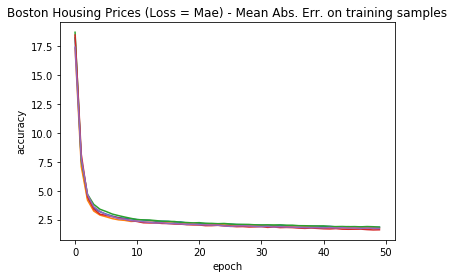

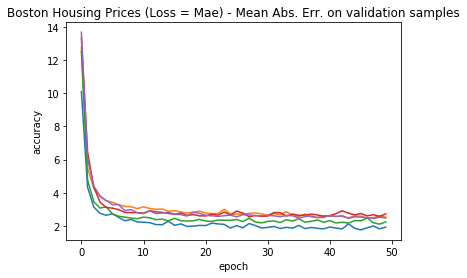

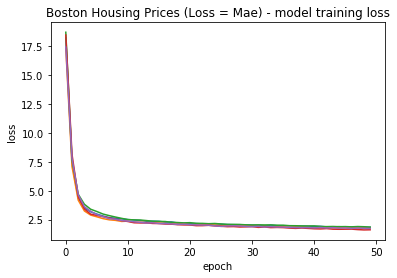

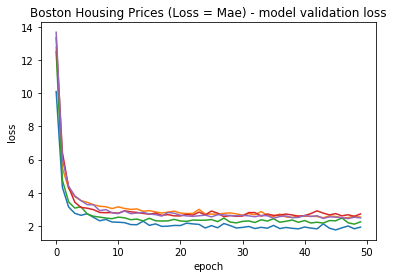

In [54]:
acc, val_acc, loss, val_loss = plot_results(history, 5, 'Boston Housing Prices (Loss = Mae)')

Let's try "mean absolute percentage error" for the loss.


In [55]:
def build_model_mape():
    seed = 762
    numpy.random.seed(seed)
    kfold = KFold(n_splits=5, random_state=seed)
    history = []
    for train, valid in kfold.split(x_train, y_train):
        model = models.Sequential()
        model.add(layers.Dense(64, activation='relu',
                               input_shape=(x_train.shape[1],)))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))

        model.compile(optimizer='rmsprop',
                  loss='mean_absolute_percentage_error',
                  metrics=['mae'])
        model.summary()
        history.append(model.fit(x_train[train], y_train[train], epochs=50, validation_data=(x_train[valid], y_train[valid]), batch_size=5, verbose=1))

    return history

In [56]:
history = build_model_mape()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_114 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 2s 5ms/step - loss: 76.7948 - mean_absolute_error: 18.5590 - val_loss: 48.5537 - val_mean_absolute_error: 10.7883
Epoch 2/50
323/323 [==============================] - 0s 842us/step - loss: 35.8329 - mean_absolute_error: 8.6987 - val_loss: 21.6795 - val_mean_absolute_error: 4.3753
Epoch 3/50
323/323 [===

323/323 [==============================] - 0s 873us/step - loss: 8.6671 - mean_absolute_error: 1.9688 - val_loss: 9.3000 - val_mean_absolute_error: 1.9393
Epoch 46/50
323/323 [==============================] - 0s 922us/step - loss: 8.6135 - mean_absolute_error: 1.9696 - val_loss: 9.2116 - val_mean_absolute_error: 1.9859
Epoch 47/50
323/323 [==============================] - 0s 968us/step - loss: 8.5850 - mean_absolute_error: 1.9694 - val_loss: 8.7703 - val_mean_absolute_error: 1.8505
Epoch 48/50
323/323 [==============================] - 0s 990us/step - loss: 8.4182 - mean_absolute_error: 1.9121 - val_loss: 10.7846 - val_mean_absolute_error: 2.0669
Epoch 49/50
323/323 [==============================] - 0s 885us/step - loss: 8.5382 - mean_absolute_error: 1.9475 - val_loss: 9.7813 - val_mean_absolute_error: 1.9936
Epoch 50/50
323/323 [==============================] - 0s 1ms/step - loss: 8.5862 - mean_absolute_error: 1.9579 - val_loss: 9.9420 - val_mean_absolute_error: 2.1142
___________

323/323 [==============================] - 0s 1ms/step - loss: 8.6046 - mean_absolute_error: 1.9656 - val_loss: 11.8874 - val_mean_absolute_error: 2.5102
Epoch 40/50
323/323 [==============================] - 0s 798us/step - loss: 8.6136 - mean_absolute_error: 1.9334 - val_loss: 12.2459 - val_mean_absolute_error: 2.5418
Epoch 41/50
323/323 [==============================] - 0s 767us/step - loss: 8.1563 - mean_absolute_error: 1.8415 - val_loss: 11.8996 - val_mean_absolute_error: 2.5060
Epoch 42/50
323/323 [==============================] - 0s 913us/step - loss: 8.3195 - mean_absolute_error: 1.9066 - val_loss: 12.8359 - val_mean_absolute_error: 2.6202
Epoch 43/50
323/323 [==============================] - 0s 975us/step - loss: 8.4088 - mean_absolute_error: 1.8977 - val_loss: 12.0444 - val_mean_absolute_error: 2.5205
Epoch 44/50
323/323 [==============================] - 0s 820us/step - loss: 8.3834 - mean_absolute_error: 1.8868 - val_loss: 12.2409 - val_mean_absolute_error: 2.5167
Epoch 

323/323 [==============================] - 0s 826us/step - loss: 9.2013 - mean_absolute_error: 2.0811 - val_loss: 11.0327 - val_mean_absolute_error: 2.2822
Epoch 34/50
323/323 [==============================] - 0s 774us/step - loss: 9.0768 - mean_absolute_error: 2.0949 - val_loss: 11.8995 - val_mean_absolute_error: 2.3392
Epoch 35/50
323/323 [==============================] - 0s 804us/step - loss: 9.1203 - mean_absolute_error: 2.0886 - val_loss: 10.9377 - val_mean_absolute_error: 2.2001
Epoch 36/50
323/323 [==============================] - 0s 817us/step - loss: 9.0734 - mean_absolute_error: 2.0716 - val_loss: 11.3344 - val_mean_absolute_error: 2.2709
Epoch 37/50
323/323 [==============================] - 0s 804us/step - loss: 9.0760 - mean_absolute_error: 2.0562 - val_loss: 11.0186 - val_mean_absolute_error: 2.2200
Epoch 38/50
323/323 [==============================] - 0s 835us/step - loss: 8.8226 - mean_absolute_error: 2.0279 - val_loss: 11.2762 - val_mean_absolute_error: 2.2264
Epoc

323/323 [==============================] - 0s 808us/step - loss: 9.0266 - mean_absolute_error: 1.9663 - val_loss: 12.0157 - val_mean_absolute_error: 2.7144
Epoch 28/50
323/323 [==============================] - 0s 774us/step - loss: 8.9271 - mean_absolute_error: 1.9597 - val_loss: 11.7931 - val_mean_absolute_error: 2.5926
Epoch 29/50
323/323 [==============================] - 0s 817us/step - loss: 8.7648 - mean_absolute_error: 1.9483 - val_loss: 11.5583 - val_mean_absolute_error: 2.6358
Epoch 30/50
323/323 [==============================] - 0s 770us/step - loss: 8.8347 - mean_absolute_error: 1.9521 - val_loss: 12.2743 - val_mean_absolute_error: 2.5971
Epoch 31/50
323/323 [==============================] - 0s 808us/step - loss: 8.9440 - mean_absolute_error: 1.9494 - val_loss: 11.5211 - val_mean_absolute_error: 2.6620
Epoch 32/50
323/323 [==============================] - 0s 761us/step - loss: 8.6603 - mean_absolute_error: 1.9244 - val_loss: 11.7794 - val_mean_absolute_error: 2.6058
Epoc

324/324 [==============================] - 0s 820us/step - loss: 9.5087 - mean_absolute_error: 2.0890 - val_loss: 11.6635 - val_mean_absolute_error: 2.8094
Epoch 22/50
324/324 [==============================] - 0s 802us/step - loss: 9.4480 - mean_absolute_error: 2.0847 - val_loss: 11.3107 - val_mean_absolute_error: 2.7447
Epoch 23/50
324/324 [==============================] - 0s 925us/step - loss: 9.3748 - mean_absolute_error: 2.0670 - val_loss: 11.2383 - val_mean_absolute_error: 2.7264
Epoch 24/50
324/324 [==============================] - 0s 854us/step - loss: 9.3174 - mean_absolute_error: 2.0541 - val_loss: 11.6342 - val_mean_absolute_error: 2.7529
Epoch 25/50
324/324 [==============================] - 0s 790us/step - loss: 9.0214 - mean_absolute_error: 2.0030 - val_loss: 11.6922 - val_mean_absolute_error: 2.8330
Epoch 26/50
324/324 [==============================] - 0s 925us/step - loss: 9.1300 - mean_absolute_error: 2.0190 - val_loss: 11.2981 - val_mean_absolute_error: 2.7158
Epoc

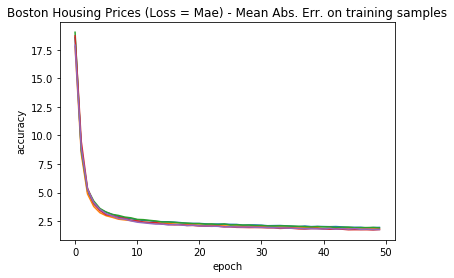

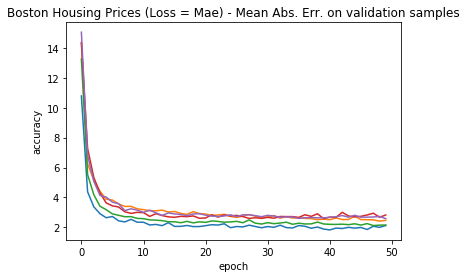

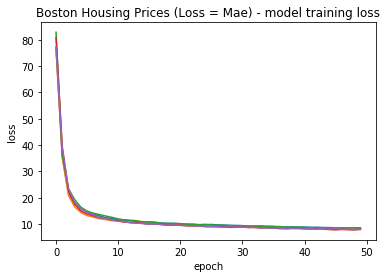

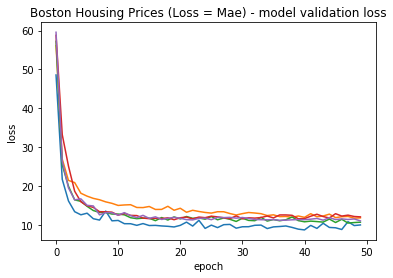

In [57]:
acc, val_acc, loss, val_loss = plot_results(history, 5, 'Boston Housing Prices (Loss = Mae)')

Another loss function: "mean_squared_logarithmic_error"

In [58]:
def build_model_msle():
    seed = 762
    numpy.random.seed(seed)
    kfold = KFold(n_splits=5, random_state=seed)
    history = []
    for train, valid in kfold.split(x_train, y_train):
        model = models.Sequential()
        model.add(layers.Dense(64, activation='relu',
                               input_shape=(x_train.shape[1],)))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(1))

        model.compile(optimizer='rmsprop',
                  loss='mean_squared_logarithmic_error',
                  metrics=['mae'])
        model.summary()
        history.append(model.fit(x_train[train], y_train[train], epochs=50, validation_data=(x_train[valid], y_train[valid]), batch_size=5, verbose=1))

    return history

In [59]:
history = build_model_msle()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_129 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Train on 323 samples, validate on 81 samples
Epoch 1/50
323/323 [==============================] - 2s 6ms/step - loss: 3.6822 - mean_absolute_error: 19.5754 - val_loss: 1.0306 - val_mean_absolute_error: 13.1320
Epoch 2/50
323/323 [==============================] - 0s 1ms/step - loss: 0.4961 - mean_absolute_error: 10.8120 - val_loss: 0.0989 - val_mean_absolute_error: 4.8154
Epoch 3/50
323/323 [========

323/323 [==============================] - 0s 811us/step - loss: 0.0141 - mean_absolute_error: 1.8928 - val_loss: 0.0164 - val_mean_absolute_error: 1.6867
Epoch 46/50
323/323 [==============================] - 0s 780us/step - loss: 0.0136 - mean_absolute_error: 1.8942 - val_loss: 0.0168 - val_mean_absolute_error: 1.7389
Epoch 47/50
323/323 [==============================] - 0s 789us/step - loss: 0.0133 - mean_absolute_error: 1.8633 - val_loss: 0.0162 - val_mean_absolute_error: 1.6628
Epoch 48/50
323/323 [==============================] - 0s 777us/step - loss: 0.0135 - mean_absolute_error: 1.8514 - val_loss: 0.0166 - val_mean_absolute_error: 1.7647
Epoch 49/50
323/323 [==============================] - 0s 808us/step - loss: 0.0135 - mean_absolute_error: 1.8665 - val_loss: 0.0181 - val_mean_absolute_error: 1.8539
Epoch 50/50
323/323 [==============================] - 0s 780us/step - loss: 0.0134 - mean_absolute_error: 1.8363 - val_loss: 0.0184 - val_mean_absolute_error: 1.9137
__________

323/323 [==============================] - 0s 826us/step - loss: 0.0137 - mean_absolute_error: 1.8717 - val_loss: 0.0263 - val_mean_absolute_error: 2.5961
Epoch 40/50
323/323 [==============================] - 0s 795us/step - loss: 0.0137 - mean_absolute_error: 1.8085 - val_loss: 0.0290 - val_mean_absolute_error: 2.7788
Epoch 41/50
323/323 [==============================] - 0s 798us/step - loss: 0.0130 - mean_absolute_error: 1.7557 - val_loss: 0.0282 - val_mean_absolute_error: 2.6872
Epoch 42/50
323/323 [==============================] - 0s 811us/step - loss: 0.0129 - mean_absolute_error: 1.8445 - val_loss: 0.0280 - val_mean_absolute_error: 2.7280
Epoch 43/50
323/323 [==============================] - 0s 811us/step - loss: 0.0134 - mean_absolute_error: 1.8050 - val_loss: 0.0314 - val_mean_absolute_error: 2.8162
Epoch 44/50
323/323 [==============================] - 0s 780us/step - loss: 0.0130 - mean_absolute_error: 1.8145 - val_loss: 0.0273 - val_mean_absolute_error: 2.6115
Epoch 45/5

323/323 [==============================] - 0s 826us/step - loss: 0.0158 - mean_absolute_error: 2.0006 - val_loss: 0.0182 - val_mean_absolute_error: 2.2484
Epoch 34/50
323/323 [==============================] - 0s 817us/step - loss: 0.0158 - mean_absolute_error: 1.9949 - val_loss: 0.0187 - val_mean_absolute_error: 2.2913
Epoch 35/50
323/323 [==============================] - 0s 823us/step - loss: 0.0157 - mean_absolute_error: 1.9548 - val_loss: 0.0178 - val_mean_absolute_error: 2.2007
Epoch 36/50
323/323 [==============================] - 0s 798us/step - loss: 0.0153 - mean_absolute_error: 1.9725 - val_loss: 0.0198 - val_mean_absolute_error: 2.3715
Epoch 37/50
323/323 [==============================] - 0s 808us/step - loss: 0.0149 - mean_absolute_error: 1.9105 - val_loss: 0.0191 - val_mean_absolute_error: 2.2055
Epoch 38/50
323/323 [==============================] - 0s 804us/step - loss: 0.0146 - mean_absolute_error: 1.9142 - val_loss: 0.0189 - val_mean_absolute_error: 2.3062
Epoch 39/5

323/323 [==============================] - 0s 823us/step - loss: 0.0131 - mean_absolute_error: 1.8824 - val_loss: 0.0379 - val_mean_absolute_error: 2.7503
Epoch 28/50
323/323 [==============================] - 0s 774us/step - loss: 0.0129 - mean_absolute_error: 1.8686 - val_loss: 0.0371 - val_mean_absolute_error: 2.7406
Epoch 29/50
323/323 [==============================] - 0s 783us/step - loss: 0.0122 - mean_absolute_error: 1.8907 - val_loss: 0.0384 - val_mean_absolute_error: 2.8199
Epoch 30/50
323/323 [==============================] - 0s 817us/step - loss: 0.0123 - mean_absolute_error: 1.8935 - val_loss: 0.0364 - val_mean_absolute_error: 2.6538
Epoch 31/50
323/323 [==============================] - 0s 792us/step - loss: 0.0123 - mean_absolute_error: 1.8961 - val_loss: 0.0373 - val_mean_absolute_error: 2.6306
Epoch 32/50
323/323 [==============================] - 0s 789us/step - loss: 0.0118 - mean_absolute_error: 1.8403 - val_loss: 0.0372 - val_mean_absolute_error: 2.7022
Epoch 33/5

324/324 [==============================] - 0s 811us/step - loss: 0.0176 - mean_absolute_error: 2.0489 - val_loss: 0.0231 - val_mean_absolute_error: 2.8481
Epoch 22/50
324/324 [==============================] - 0s 805us/step - loss: 0.0181 - mean_absolute_error: 2.0474 - val_loss: 0.0223 - val_mean_absolute_error: 2.7167
Epoch 23/50
324/324 [==============================] - 0s 793us/step - loss: 0.0176 - mean_absolute_error: 2.0452 - val_loss: 0.0217 - val_mean_absolute_error: 2.6209
Epoch 24/50
324/324 [==============================] - 0s 780us/step - loss: 0.0165 - mean_absolute_error: 2.0372 - val_loss: 0.0220 - val_mean_absolute_error: 2.6976
Epoch 25/50
324/324 [==============================] - 0s 787us/step - loss: 0.0169 - mean_absolute_error: 1.9885 - val_loss: 0.0226 - val_mean_absolute_error: 2.6754
Epoch 26/50
324/324 [==============================] - 0s 796us/step - loss: 0.0161 - mean_absolute_error: 1.9599 - val_loss: 0.0227 - val_mean_absolute_error: 2.6409
Epoch 27/5

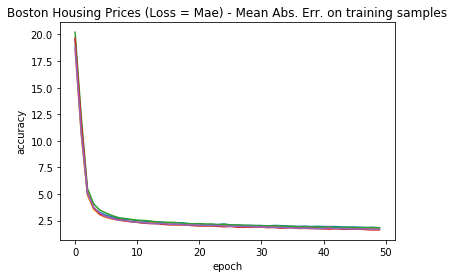

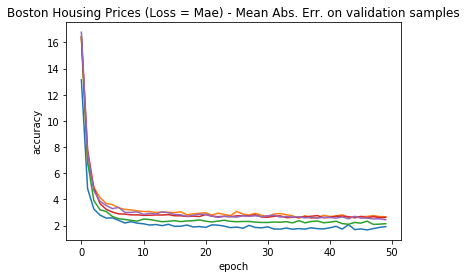

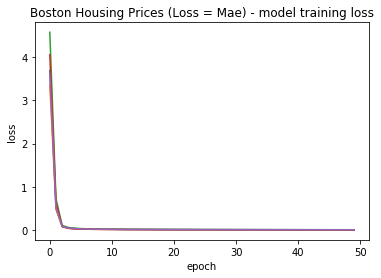

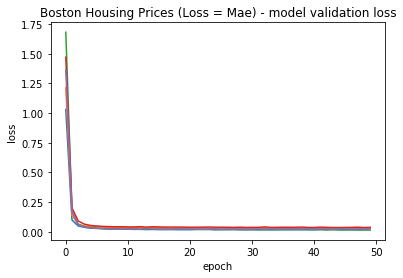

In [60]:
acc, val_acc, loss, val_loss = plot_results(history, 5, 'Boston Housing Prices (Loss = Mae)')